In [3]:
!pip install pymongo

   ---------------------------------------- 0.0/896.7 kB ? eta -:--:--
   --------------------------------------- 896.7/896.7 kB 20.5 MB/s eta 0:00:00


In [5]:
import pymongo
import pandas as pd

# Connexion à la base MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["ecommerce"]
collection = db["user_activity_processed"]

# Charger les données dans un DataFrame
df = pd.DataFrame(list(collection.find()))

# Afficher un aperçu
df.head()

,_id,event_id,user_id,timestamp,activity_type,product_id,price,category,device,location,session_id,event_timestamp,price_category,weekday,processing_time
0,680650c89541c44308b153a7,fd0d405d-7d8c-4dc4-a808-7febeacc4717,5780,2025-04-21T15:32:11.235739,search,88459,937.80,beauty,mobile,CA,sess_5811,2025-04-21 13:32:11.235,high,Monday,2025-04-21 13:55:02.439
1,680650c89541c44308b153a8,36cc68ad-106c-4549-b324-f88f4c213ad5,9700,2025-04-21T15:32:11.373578,purchase,77690,742.40,electronics,mobile,US,sess_5919,2025-04-21 13:32:11.373,high,Monday,2025-04-21 13:55:02.439
2,680650c89541c44308b153a9,d4189a02-0125-4a43-92bc-d78f503a25bf,5870,2025-04-21T15:32:11.427361,add_to_cart,68254,446.80,beauty,tablet,DE,sess_2037,2025-04-21 13:32:11.427,high,Monday,2025-04-21 13:55:02.439
3,680650c89541c44308b153aa,97385c00-1da6-43bd-993e-89866eb274f8,2660,2025-04-21T15:32:11.449276,search,79958,766.17,clothing,mobile,JP,sess_4121,2025-04-21 13:32:11.449,high,Monday,2025-04-21 13:55:02.439
4,680650c89541c44308b153ab,cefc55ad-4300-49c3-8af6-65b79e1df47b,7748,2025-04-21T15:32:11.460575,purchase,67838,415.26,electronics,desktop,DE,sess_9959,2025-04-21 13:32:11.460,high,Monday,2025-04-21 13:55:02.439


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

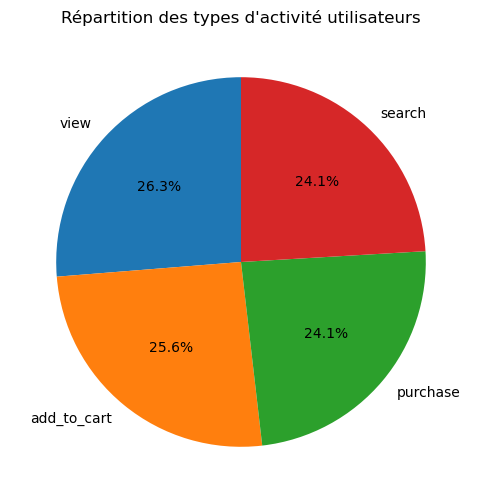

In [9]:
plt.figure(figsize=(6, 6))
df['activity_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Répartition des types d'activité utilisateurs")
plt.ylabel('')
plt.show()

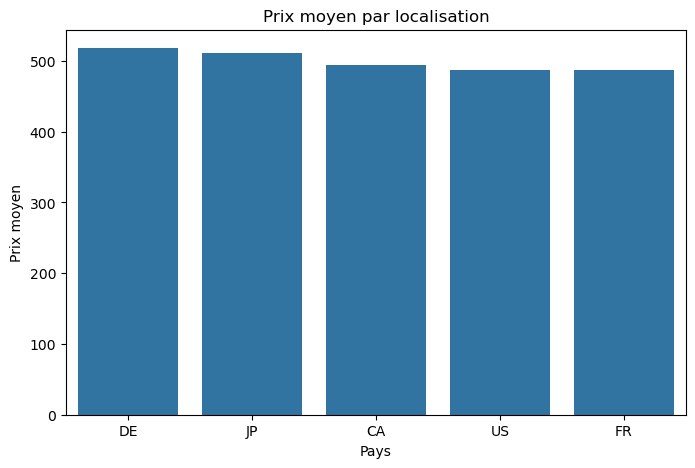

In [13]:
plt.figure(figsize=(8, 5))
avg_price = df.groupby("location")["price"].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Prix moyen par localisation")
plt.ylabel("Prix moyen")
plt.xlabel("Pays")
plt.show()

<Figure size 1000x500 with 0 Axes>

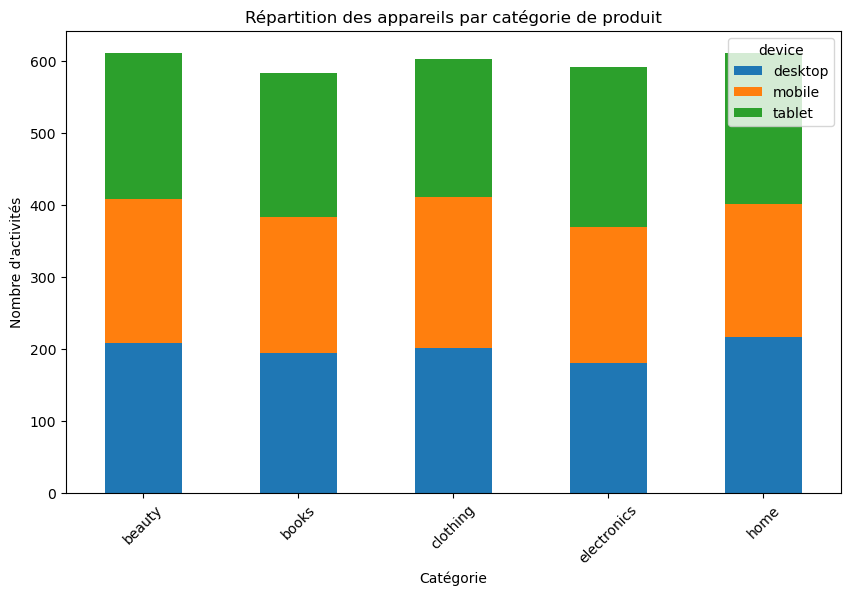

In [15]:
plt.figure(figsize=(10, 5))
device_cat = df.groupby(["category", "device"]).size().unstack().fillna(0)
device_cat.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Répartition des appareils par catégorie de produit")
plt.ylabel("Nombre d'activités")
plt.xlabel("Catégorie")
plt.xticks(rotation=45)
plt.show()